In [1]:
from pyMCDS import pyMCDS
import numpy as np
import matplotlib.pyplot as plt
import os.path
import mltools as ml
import matplotlib.mlab as mlab
from scipy.stats import norm
from scipy.stats import beta
# magick mogrify -format jpg *.svg
# magick convert *.svg out.gif
# magick convert -delay 40 *.png animated.gif 
# $ git init
# $ git add .
# $ git commit -m "First commit"
#
#

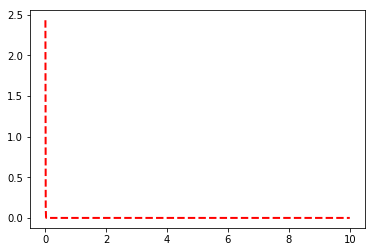

In [32]:
y = beta.pdf(np.linspace(0,10,1000),a,b)
plt.plot(np.linspace(0,10,1000), y, 'r--', linewidth=2)

In [43]:
mcds= pyMCDS('output00000045.xml', 'C:\\Users\Yushang\Desktop\Radiotherapy_uci-master\output_pressure_inhibition_only')
t=mcds.get_time()
cx = mcds.data['discrete_cells']['position_x']
cy = mcds.data['discrete_cells']['position_y']
op = mcds.data['discrete_cells']['pressure']
sp = mcds.data['discrete_cells']['volume']
cycle=mcds.data['discrete_cells']['cycle_model']
cycle=cycle.astype(int )
all_type = mcds.data['discrete_cells']['cell_type']
all_type=all_type.astype(int )
live = np.argwhere( cycle < 100 ).flatten()
dead = np.argwhere( cycle >= 100 ).flatten()
# & (op<=1)
ind=np.argwhere( (cycle<100)) .flatten()
n_live= len( live )
n_dead=len( dead)
np.mean(op[live])
fig = plt.figure()
plt.clf()
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.scatter( cx[ind],cy[ind],c=op[ind],s=sp[ind]/2500);
plt.colorbar()
plt.axis('image')
plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr', size=15)
plt.xlim((-1500,1500))
plt.ylim((-1500,1500))
plt.subplot(222)
_,bins,_= plt.hist( [op[np.argwhere(all_type==c).flatten()] for c in np.unique(all_type)],bins=20,histtype='barstacked',density=True)
plt.title('Live cells pressure at t=' +str(t/60) + 'hr fit beta', size=15)
a, b, loc, scale = beta.fit(op,loc=0,scale=len(live))
y = beta.pdf(np.linspace(0,10,1000),a,b)
plt.plot(np.linspace(0,10,1000), y, 'r--', linewidth=2)
plt.subplot(223)
ml.histy( op,all_type,bins=20)
plt.title( 'Live cells pressure at t=' +str(t/60) + 'hr', size=15)
# plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
fig.savefig('plot.png')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Yushang\\Desktop\\Radiotherapy_uci-master\\output_pressure_inhibition_only\\output00000045.xml'

C:\Users\Yushang\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Yushang\anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\Yushang\anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

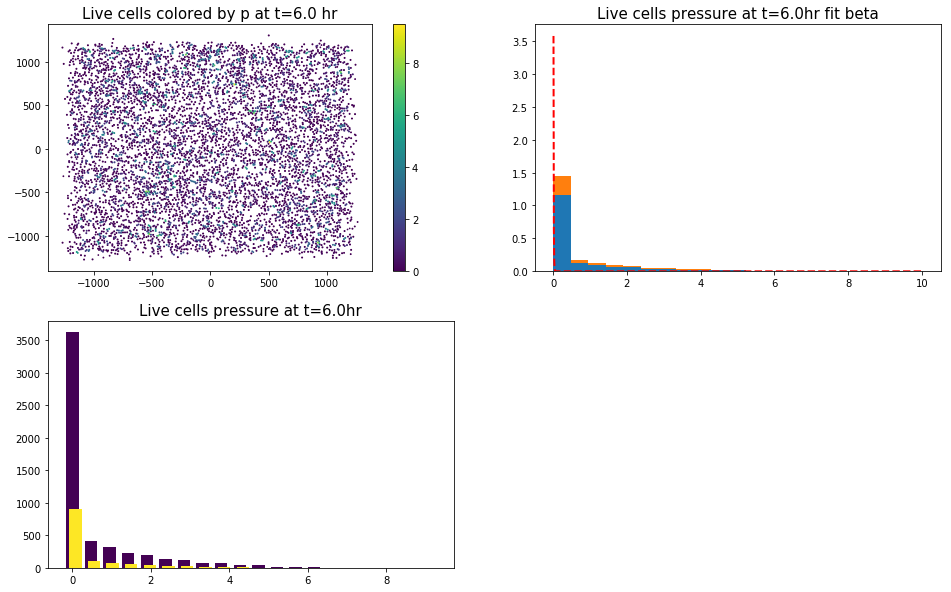

<Figure size 432x288 with 0 Axes>

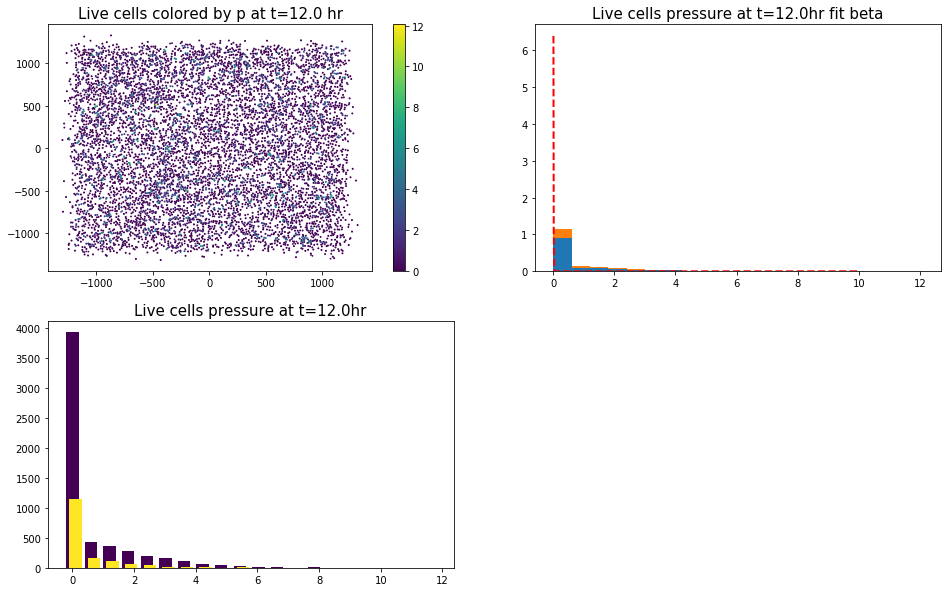

<Figure size 432x288 with 0 Axes>

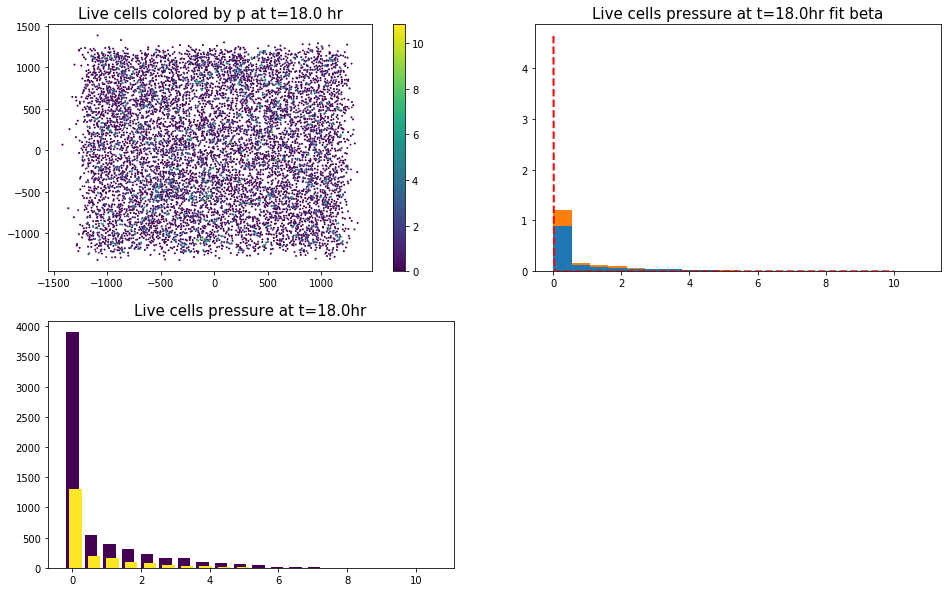

<Figure size 432x288 with 0 Axes>

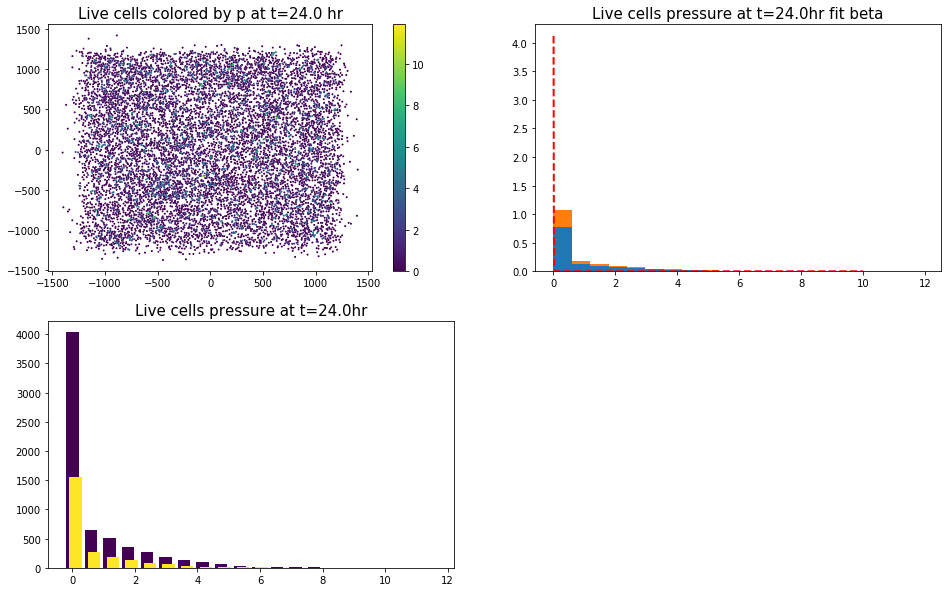

<Figure size 432x288 with 0 Axes>

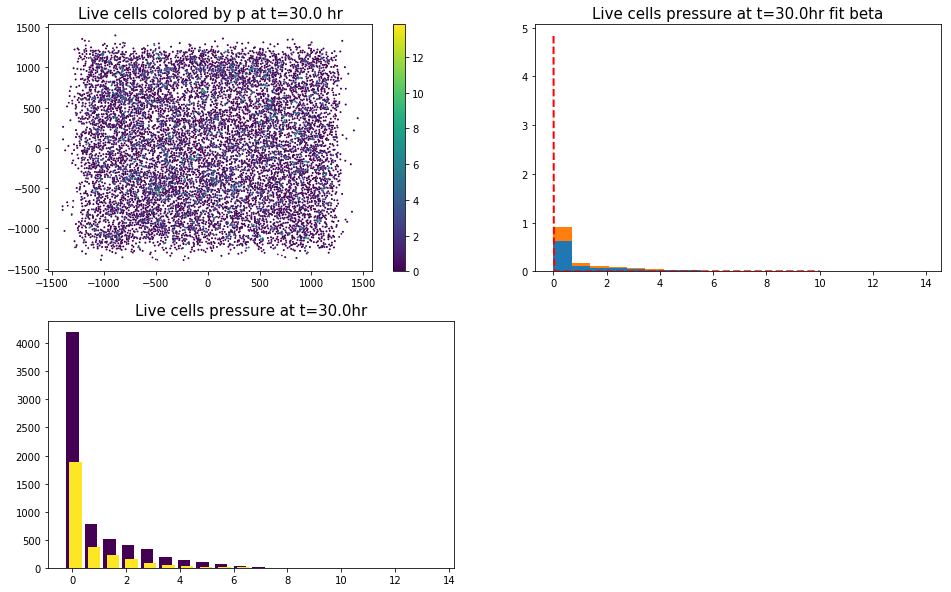

<Figure size 432x288 with 0 Axes>

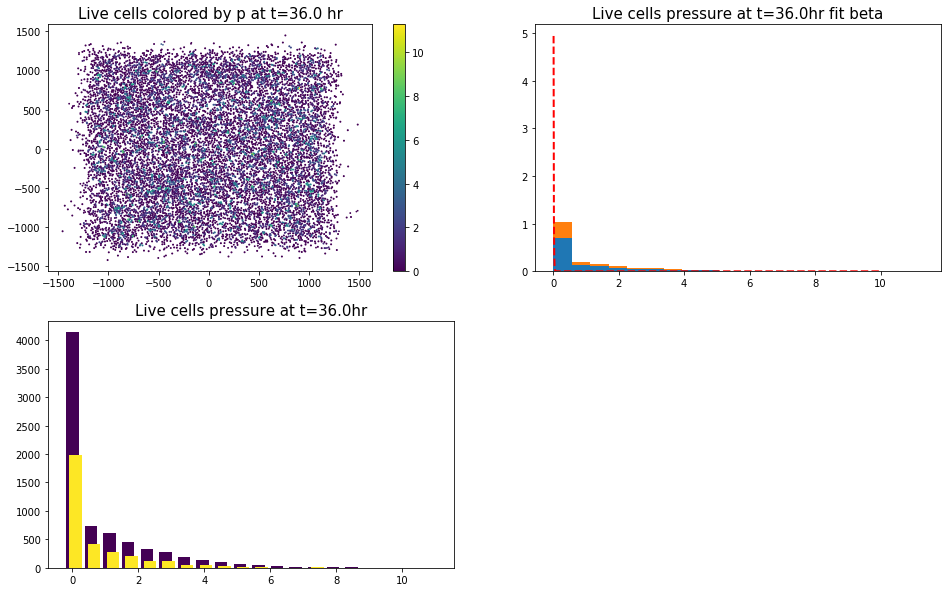

<Figure size 432x288 with 0 Axes>

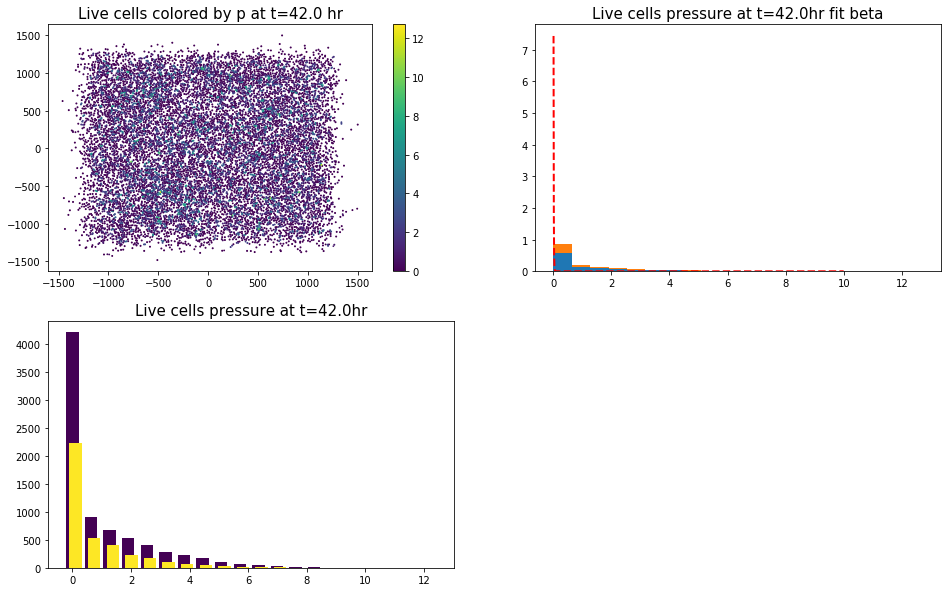

<Figure size 432x288 with 0 Axes>

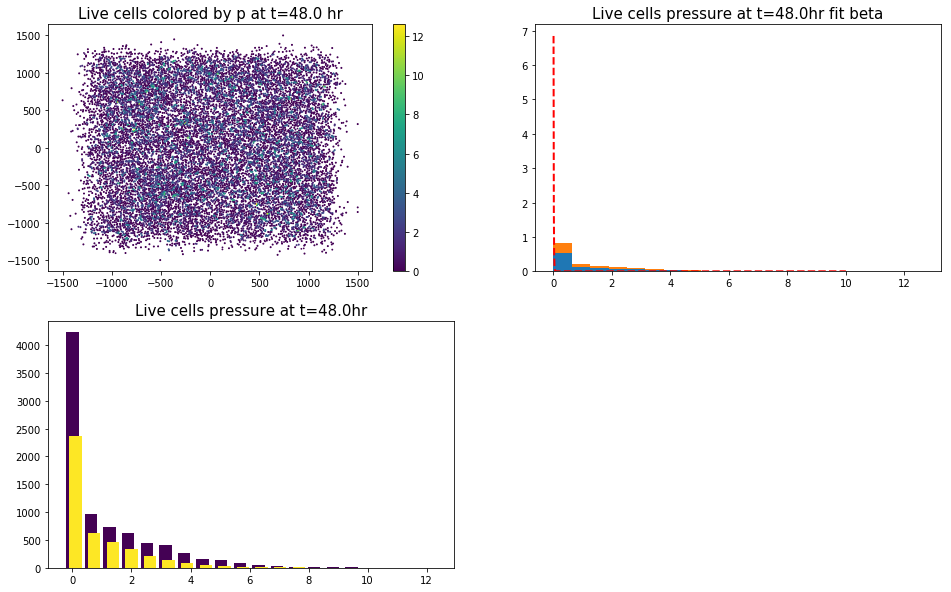

<Figure size 432x288 with 0 Axes>

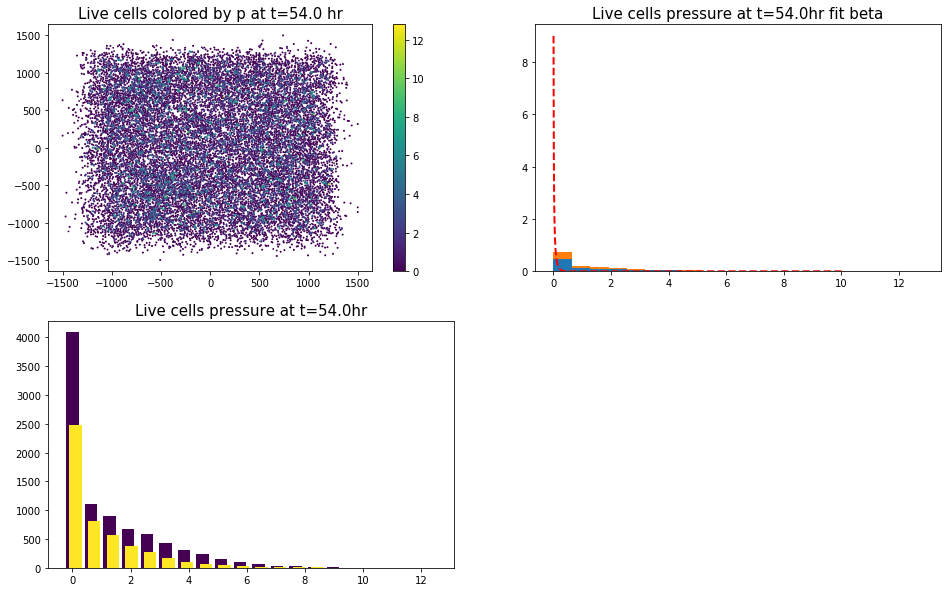

<Figure size 432x288 with 0 Axes>

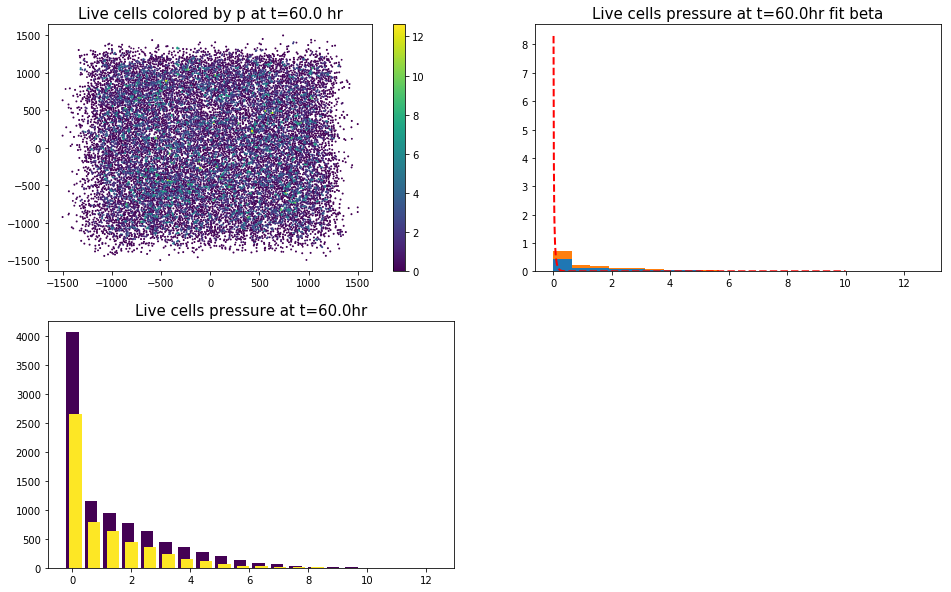

<Figure size 432x288 with 0 Axes>

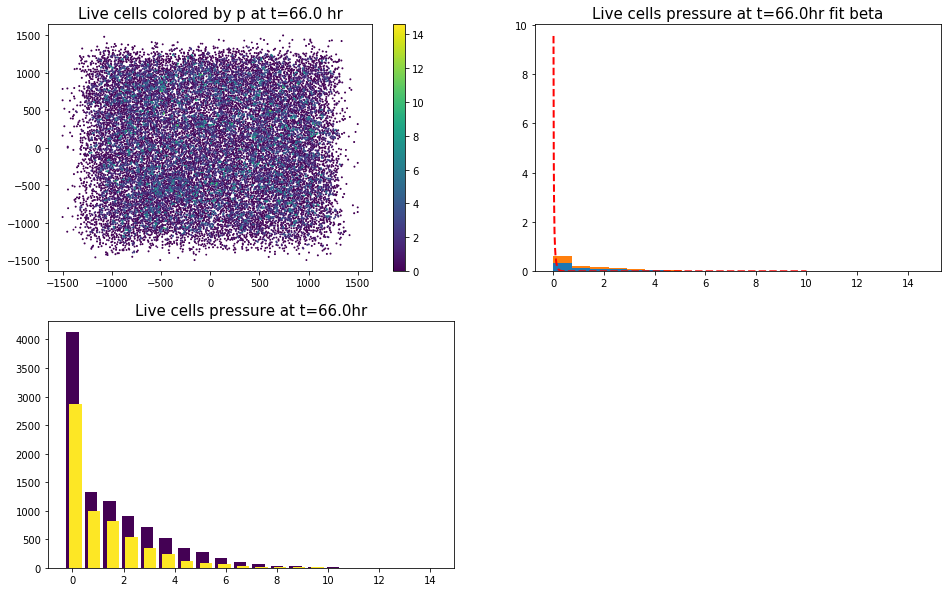

<Figure size 432x288 with 0 Axes>

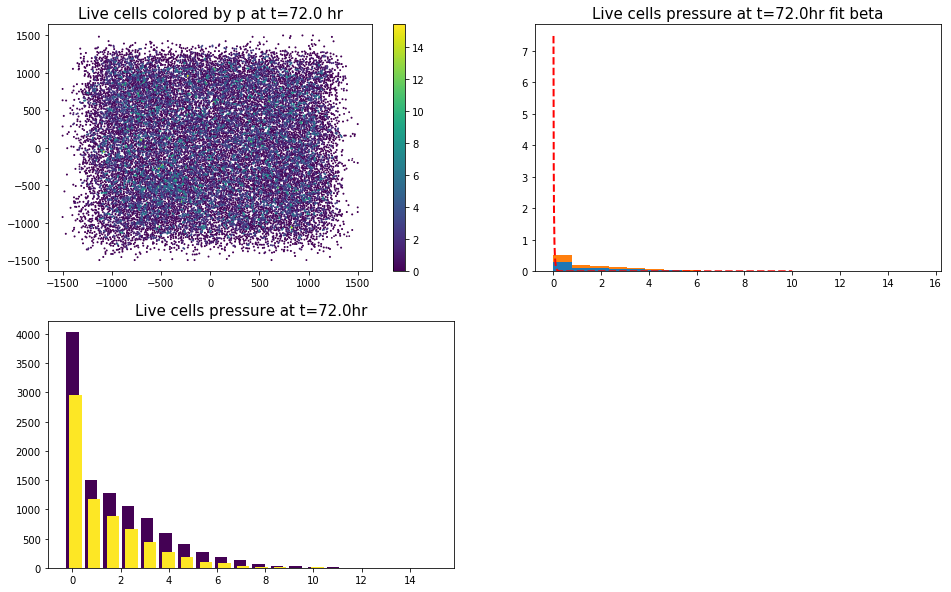

<Figure size 432x288 with 0 Axes>

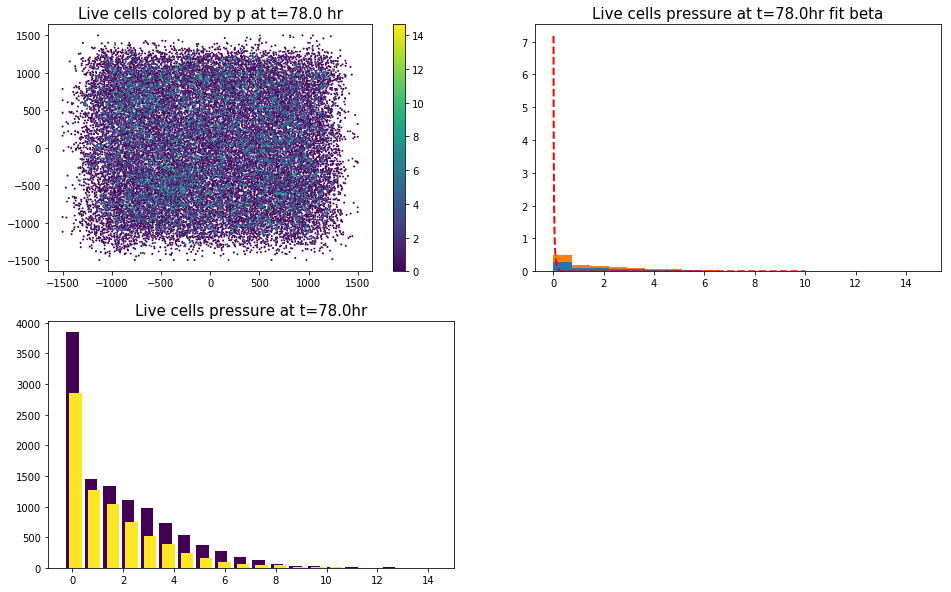

<Figure size 432x288 with 0 Axes>

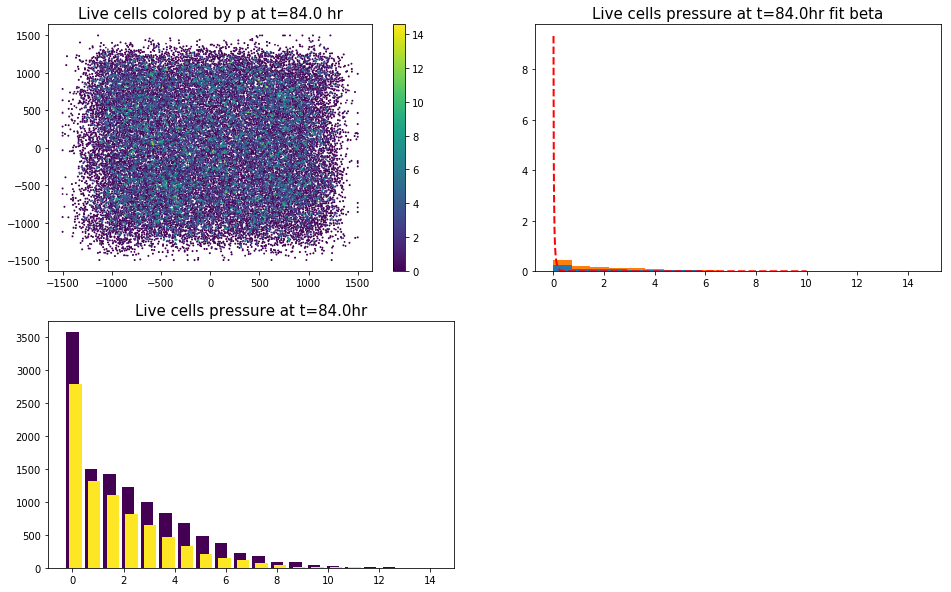

<Figure size 432x288 with 0 Axes>

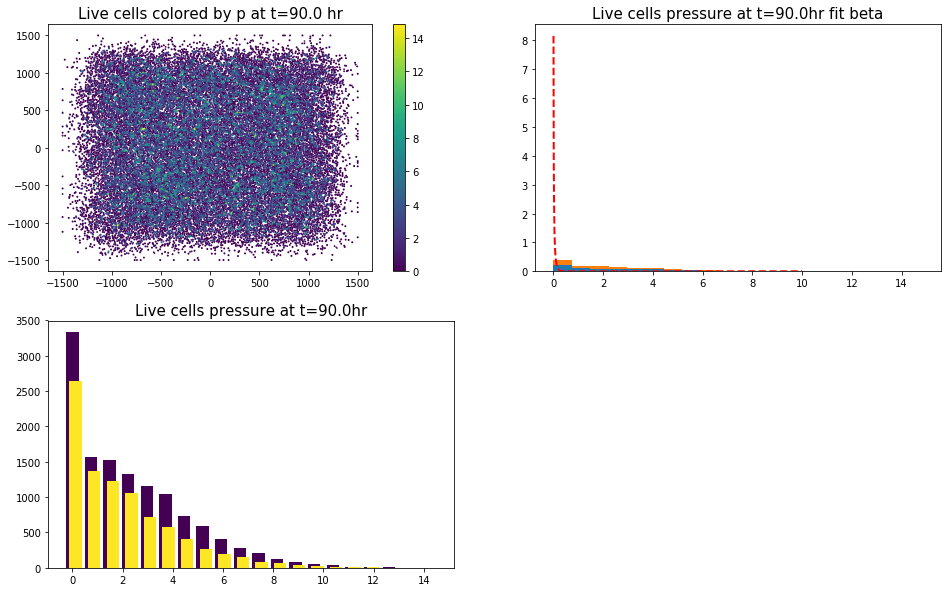

<Figure size 432x288 with 0 Axes>

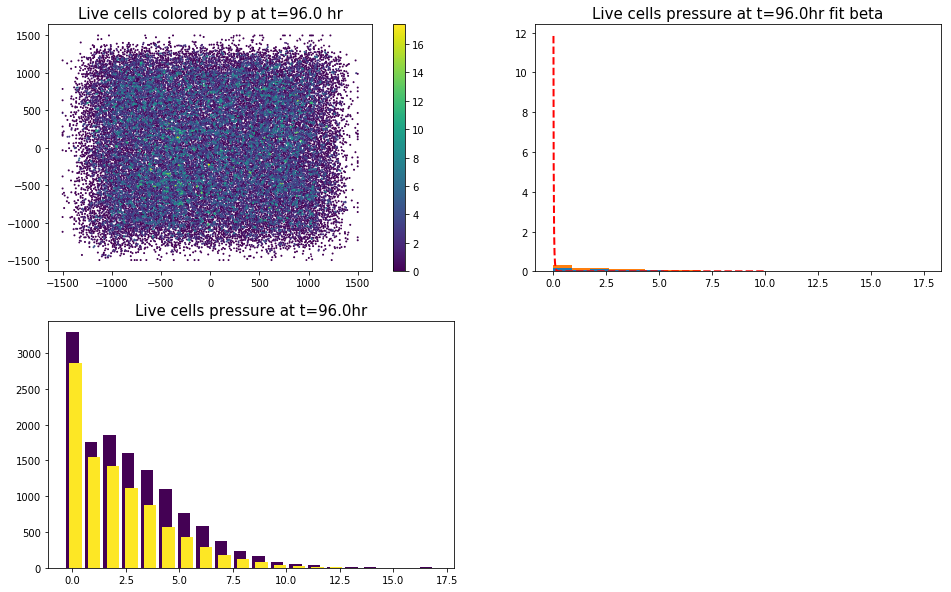

<Figure size 432x288 with 0 Axes>

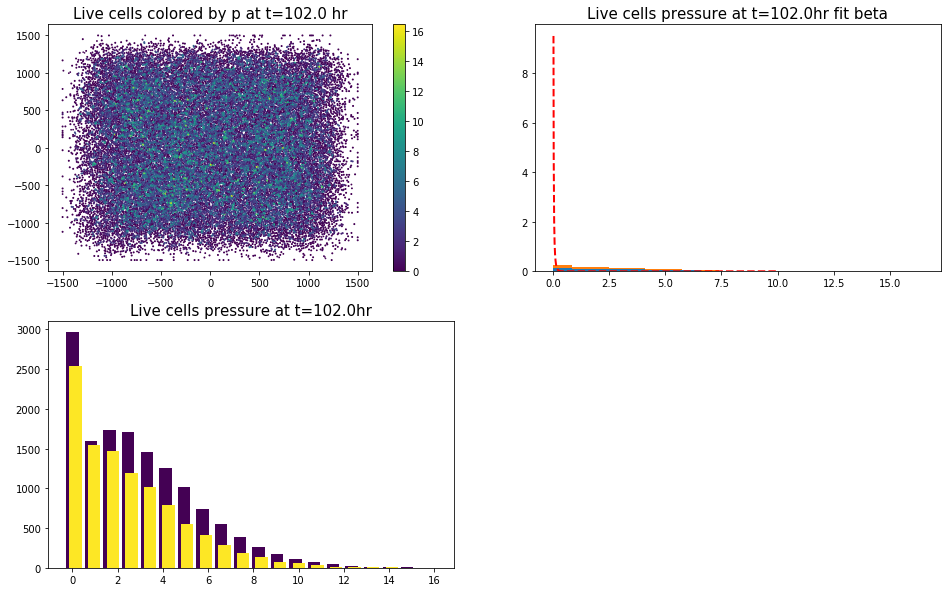

<Figure size 432x288 with 0 Axes>

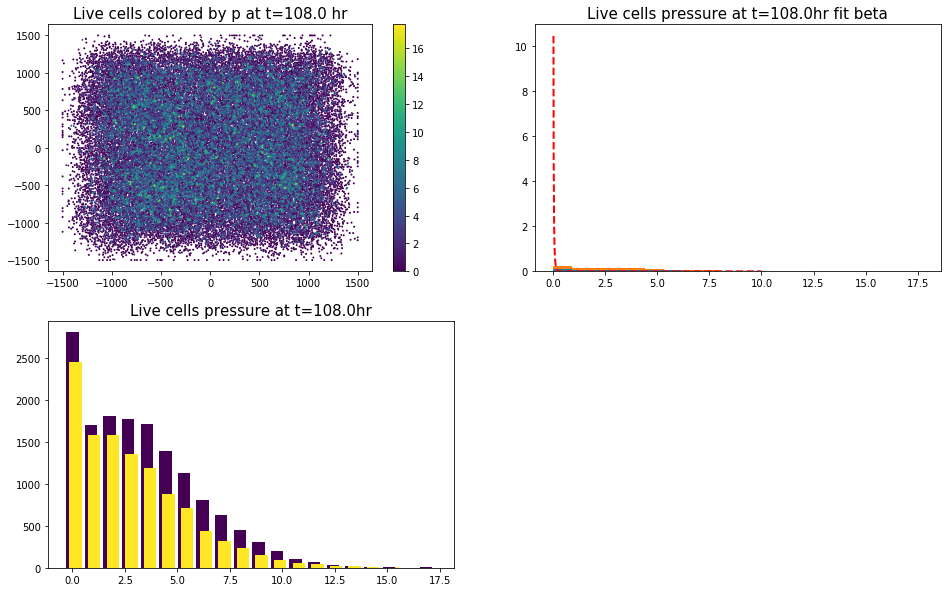

<Figure size 432x288 with 0 Axes>

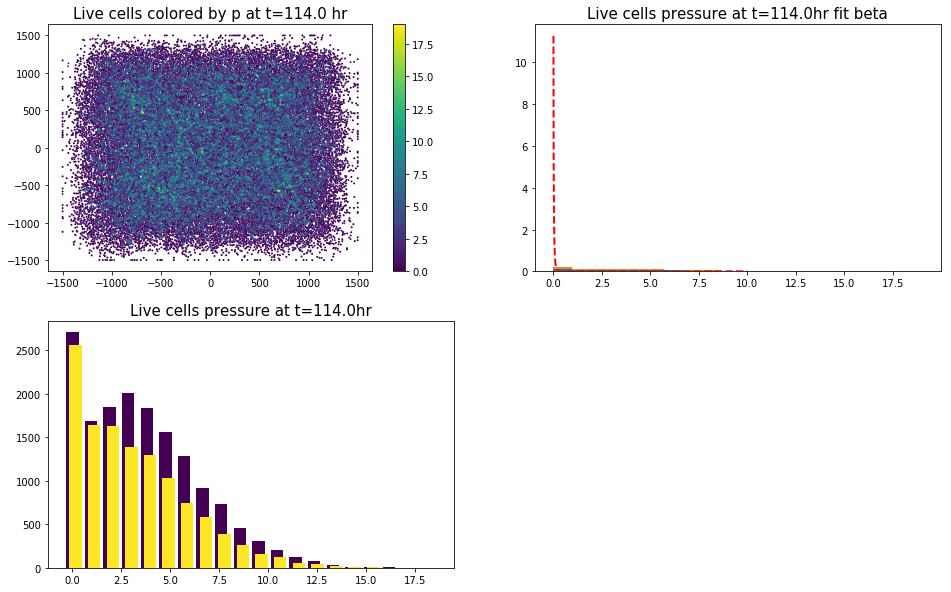

<Figure size 432x288 with 0 Axes>

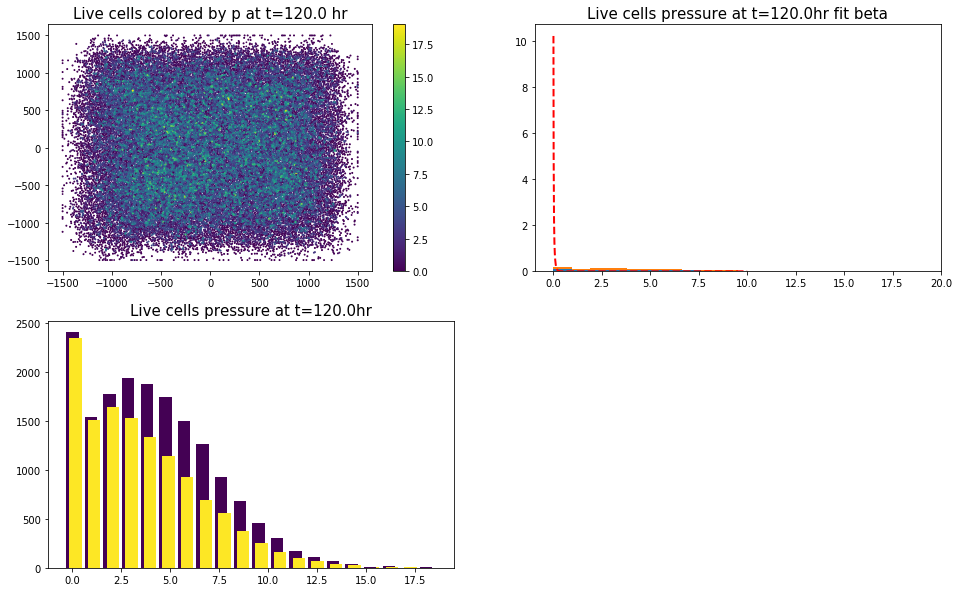

In [42]:
last_index = 20
for n in range( 1,last_index+1):
    filename='output'+"%08i"%n+'.xml'
    mcds=pyMCDS(filename,'D:\\output')
    t=mcds.get_time()
    cx = mcds.data['discrete_cells']['position_x']
    cy = mcds.data['discrete_cells']['position_y']
    op = mcds.data['discrete_cells']['pressure']
    sp = mcds.data['discrete_cells']['volume']
    cycle=mcds.data['discrete_cells']['cycle_model']
    cycle=cycle.astype(int )
    all_type = mcds.data['discrete_cells']['cell_type']
    all_type=all_type.astype(int )
    live = np.argwhere( cycle < 100 ).flatten()
    dead = np.argwhere( cycle >= 100 ).flatten()
    # & (op<=1)
    ind=np.argwhere( (cycle<100)) .flatten()
    n_live= len( live )
    n_dead=len( dead)
    np.mean(op[live])
    fig = plt.figure()
    plt.clf()
    plt.figure(figsize=(16,10))
    plt.subplot(221)
    plt.scatter( cx[ind],cy[ind],c=op[ind],s=sp[ind]/2500);
    plt.colorbar()
    plt.xlim((-1500,1500))
    plt.ylim((-1500,1500))
    # plt.axis('image')
    plt.title( 'Live cells colored by p at t=' +str(t/60) + ' hr', size=15)
    plt.subplot(222)
    _,bins,_= plt.hist( [op[np.argwhere(all_type==c).flatten()] for c in np.unique(all_type)],bins=20,histtype='barstacked',density=True)
    plt.title('Live cells pressure at t=' +str(t/60) + 'hr fit beta', size=15)
    a, b, loc, scale = beta.fit(op,loc=0,scale=len(live))
    y = beta.pdf(np.linspace(0,10,1000),a,b)
    plt.plot(np.linspace(0,10,1000), y, 'r--', linewidth=2)
    plt.subplot(223)
    ml.histy( op,all_type,bins=20)
    plt.title( 'Live cells pressure at t=' +str(t/60) + 'hr', size=15)
    plt.savefig('output'+"%08i"%n+'.png')               
                

In [55]:
save_path = 'C:\\Users\zeXal\Desktop\stem_cells-master-1\stem_cells-master\python-loader-master\python-loader-master\fig\';
#filename = 'output'+"%08i"%n+'.png'
#completeName = os.path.join(save_path,  filename) 


SyntaxError: EOL while scanning string literal (<ipython-input-55-3cdd7a800fb2>, line 1)